In [3]:
import numpy as np

height = [60, 62, 65, 68, 70, 74]
weight = [140, 138, 150, 166, 190, 250]

np.corrcoef(height, weight)[0][1] # Devem ser de mesmo tamanho. O 0 e 1 é usado para acessar a correlação que queremos.

0.9298974521408027

In [5]:
import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [6]:
df.charges.corr(df.bmi) # Nos da a correlação individual.

0.19834096883362895

In [14]:
from scipy import stats
r, p = stats.pearsonr(df.charges, df.age) #podemos setar assim porque sempre retorna o primeiro valor como correlção e o segundo com p-value.
print(round(r,4), round(p,4))
# Dado que o p-value é tão pequeno, o r que obtemos é confiável.


0.299 0.0


In [20]:
corr_df = pd.DataFrame(columns=['r', 'p'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
        r, p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = round(r, 3), round(p, 3)


corr_df

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


Plotando um scatterplot que diz respeito ao preço do seguro relacionado com a idade

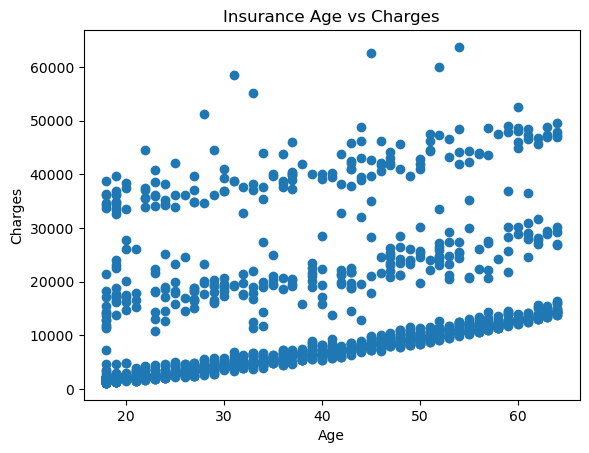

In [24]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['charges'])
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

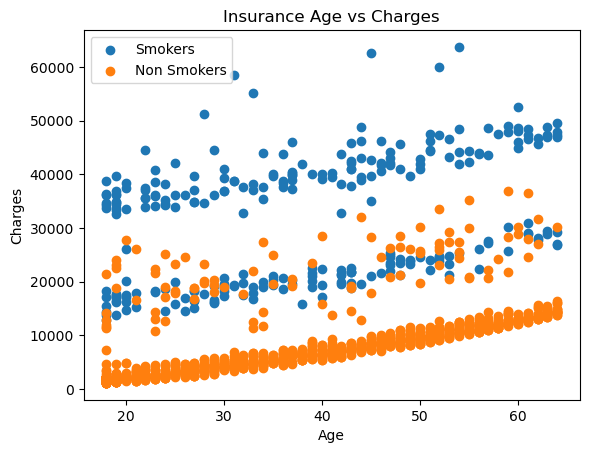

In [28]:
df_smoker = df[df['smoker'] == 'yes'] # jeito fácil de separar o dataframe quando temos uma coluna binária.
df_no_smoker = df[df['smoker'] == 'no'] 

plt.scatter(df_smoker['age'], df_smoker['charges'], label='Smokers')
plt.scatter(df_no_smoker['age'], df_no_smoker['charges'], label='Non Smokers')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

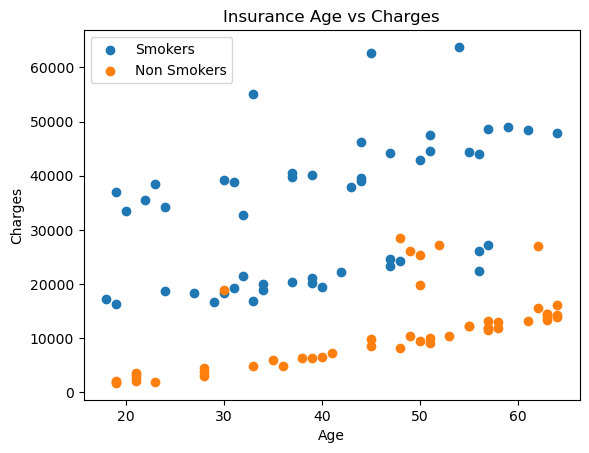

In [30]:
df_smoker_reduzido = df_smoker.sample(50) # jeito fácil de separar o dataframe quando temos uma coluna binária.
df_no_smoker_reduzido = df_no_smoker.sample(50)

plt.scatter(df_smoker_reduzido['age'], df_smoker_reduzido['charges'], label='Smokers')
plt.scatter(df_no_smoker_reduzido['age'], df_no_smoker_reduzido['charges'], label='Non Smokers')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

Em geral, as pessoas que não fumam tem o seu com baixo custo, mas além disso, existe alguma coisa separando os fumantes em dois grupos diferentes

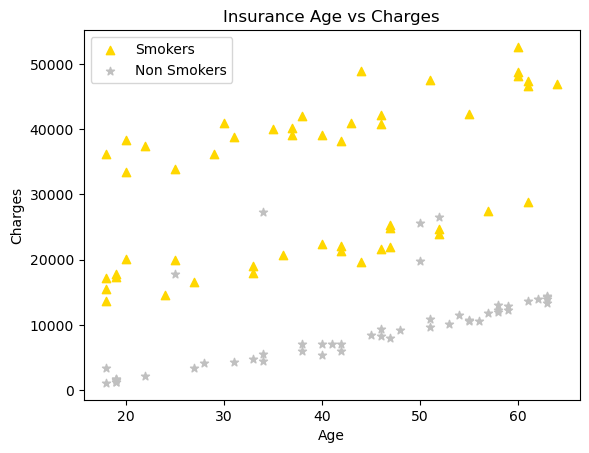

In [31]:
df_smoker_reduzido = df_smoker.sample(50) # jeito fácil de separar o dataframe quando temos uma coluna binária.
df_no_smoker_reduzido = df_no_smoker.sample(50)

plt.scatter(df_smoker_reduzido['age'], df_smoker_reduzido['charges'], label='Smokers', color='gold', marker='^')
plt.scatter(df_no_smoker_reduzido['age'], df_no_smoker_reduzido['charges'], label='Non Smokers', color='silver', marker='*')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

Adicionando um linha de regressão ao meu plot

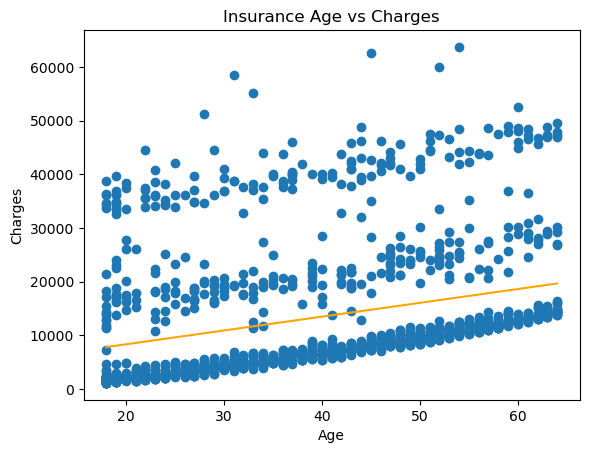

In [41]:
# y = mx + b
# y = slope(x) + intercept
# stderr: represent the spread of the values.

m, b, r, p, sterr = stats.linregress(df.age, df.charges)

x = range(18, df.age.max()+1)
y = m * x + b
plt.plot(x, y, color='orange')

plt.scatter(df['age'], df['charges'])
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [48]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Calculating heteroscedasticity (the spread along the regression line, if it is constant or no).

model = ols(formula='age~charges', data=df).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F stat p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df

,LM stat,LM p-value,F-stat,F stat p-value
White,113.205738,2.616293e-25,61.695937,2.358806e-26
Breusch-Pagan,48.227283,3.795702e-12,49.955817,2.525670e-12


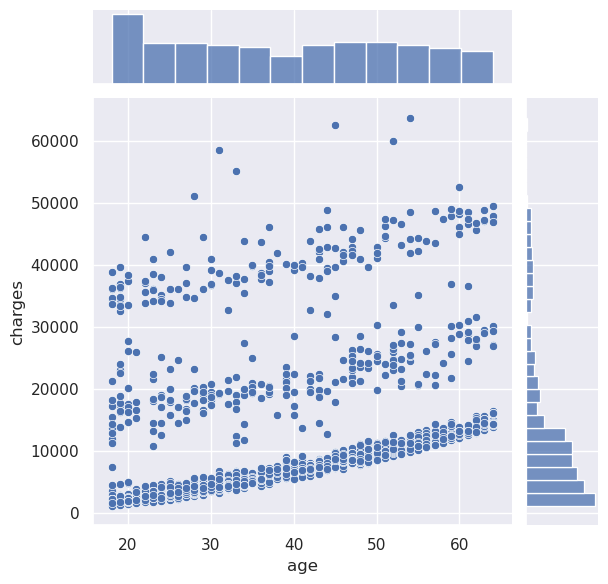

In [50]:
import seaborn as sns

sns.set(color_codes=True)
sns.jointplot(x='age', y='charges', data=df)
plt.show()

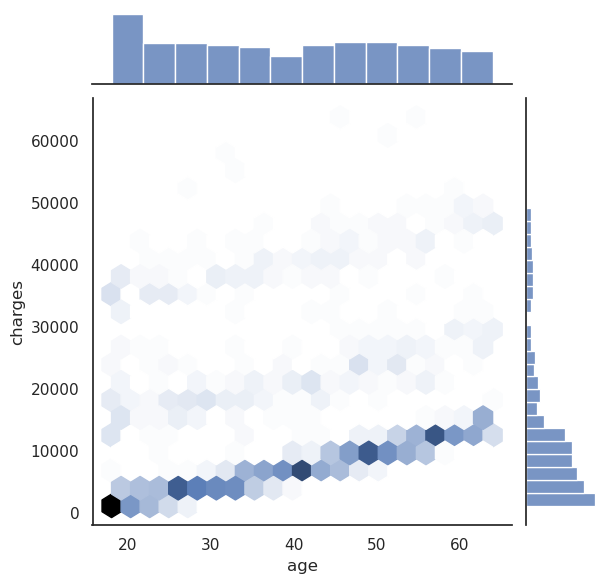

In [52]:
sns.set_style('white')
sns.jointplot(x='age', y='charges', data=df, kind='hex')

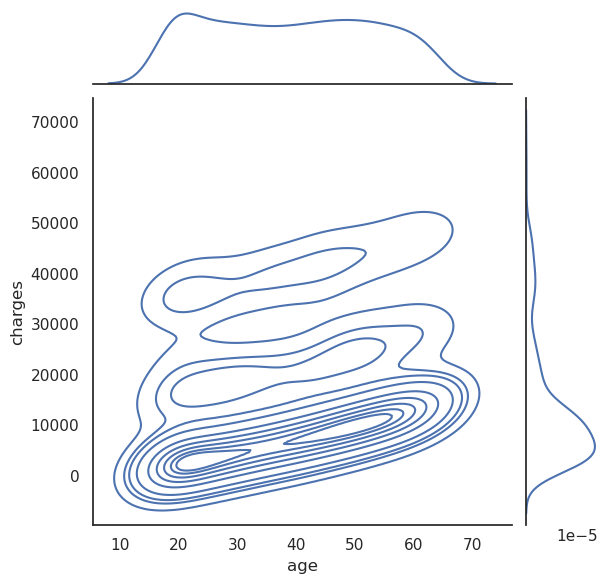

In [53]:
sns.jointplot(x='age', y='charges', data=df, kind='kde')

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

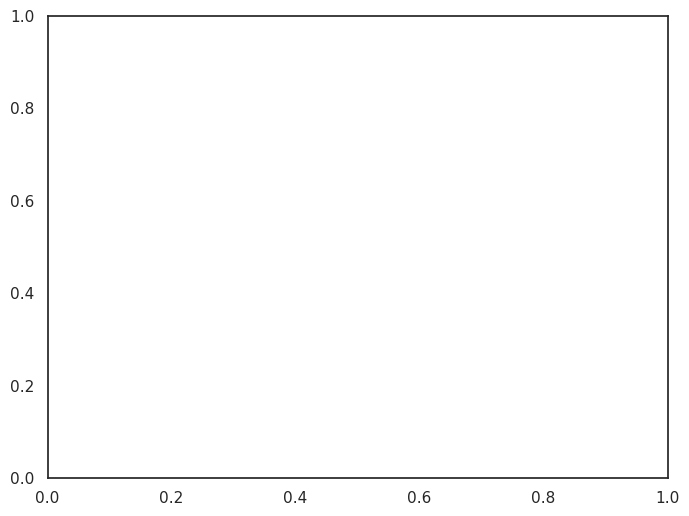

In [58]:
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.age, df.charges, cmap=cmap, levels=60, shade=True)